PHASE 1 PROJECT

1. What are the highest grossing film genres Microsoft can invest in? 
2. What are the best combinations (if any) of the highest grossing films by genre
3. Who are the best directors for that job? 
4. BONUS: An animated visualization of trends of movies since 1980

## IMPORT ALL NECESSARY PACKAGES FOR THE PROJECT

In [1]:
# Import necessary files
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
%matplotlib inline

## Import all Necessary files and convert them to DataFrames


In [2]:
# Import reviews file
try:
    # Attempt to read the TSV file
    reviews_df = pd.read_csv(r'data\rt.reviews.tsv', delimiter='\t', encoding='ISO-8859-1')

except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")
    
#  Display the first few rows of the DataFrame
reviews_df.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


In [3]:
# Import the Movie_info TSV file

try:
    # Attempt to read the TSV file
    movie_info_df = pd.read_csv(r'data\rt.movie_info.tsv', delimiter='\t', encoding='ISO-8859-1')

except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")
#  Display the first few rows of the DataFrame
movie_info_df.head(3)  

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [4]:
# Improt and read the tmdb.CSV file
try:
    
    tmdb_df = pd.read_csv(r'data\tmdb.csv')
    
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

# Display the first few rows of the DataFrame
tmdb_df.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [5]:
# Read the tn.movie_budgets.CSV file
try:
    
    tn_movie_budget_df = pd.read_csv(r'data\tn.movie_budgets.csv')

except Exception as e: # Display the error if any
    print(f"An unexpected error occurred: {str(e)}")

# Display the first few rows of the DataFrame
tn_movie_budget_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# Import and read the database. Read the Movie_basics table
connection = None
try:
    # Attempt to establish a connection to the SQLite database
    connection = sqlite3.connect(r'data\im.db')

    # SQL query to join the tables using movie_id
    query = """
    SELECT *
    FROM movie_basics
    """

    # Use Pandas to read the query result into a DataFrame
    sql_df = pd.read_sql_query(query, connection)

except sqlite3.Error as e:
    print(f"SQLite Error: {e}")
    # Handle the exception here, i.e, print an error message

finally:
    # Close the connection in the finally block to ensure it gets closed even if an exception occurs
    if connection:
        connection.close()

sql_df.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


##  Kaggle Dataset
#### This data was downloaded from https://www.kaggle.com/datasets/danielgrijalvas/movies


In [7]:

#  Read the tn.movie_budgets.CSV file
try:
    
    movies_df = pd.read_csv(r'data\movies.csv')

except Exception as e: # Display the error if any
    print(f"An unexpected error occurred: {str(e)}")

# Example: Display the first few rows of the DataFrame
movies_df.head(3)  

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [8]:
# The dataset has movies to be published in 2115. 
# Any movie yet to be released is removed from the dataset
mask = sql_df['start_year'] < 2023
# Finding and dropping outliers
# Use the drop function to remove rows based on the mask
sql_df = sql_df[mask]
len(sql_df)

146133

# 1. What are the highest grossing film genres Microsoft can invest in? 

# Lets see the top 10 Genres by Gross Earnings

In [9]:
# Since figures are in billions, we create a function to convert all figures (gross) to billions
from matplotlib.ticker import FuncFormatter

def billions_formatter(x, pos):
    return f'{x / 1e9} billion'

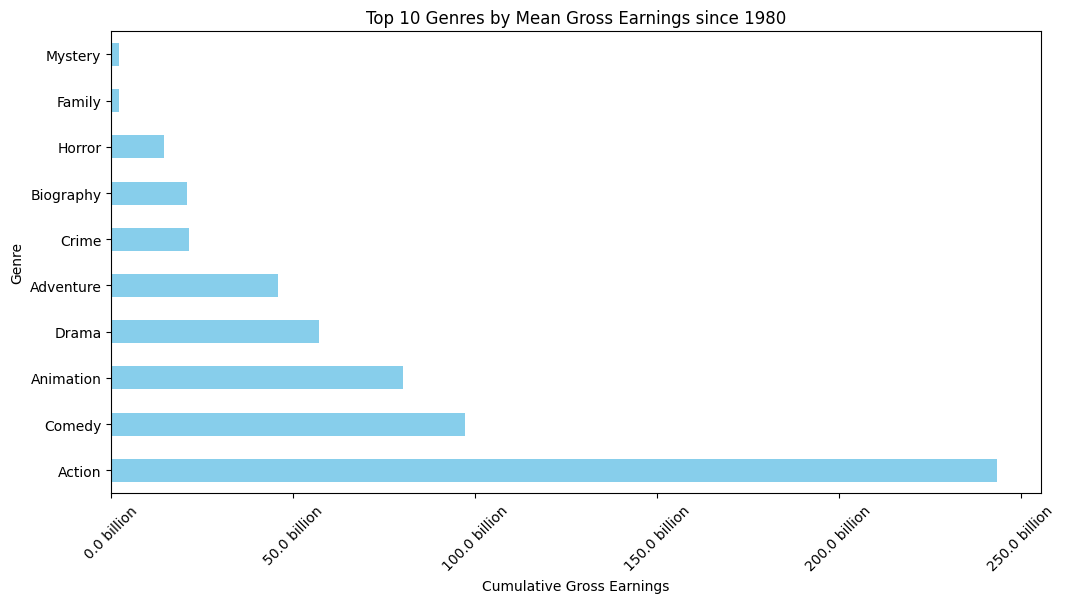

In [10]:
# To find the top grossing genres we use the movies_df dataset
genre_gross = movies_df.groupby('genre')['gross'].sum().sort_values(ascending=False).head(10)

# Plotting a bar graph
plt.figure(figsize=(12, 6))
genre_gross.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres by Mean Gross Earnings since 1980')
plt.xlabel('Cumulative Gross Earnings')
plt.ylabel('Genre')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.show()

## The top 3 highest grossing genres are Action, Comedy and Animation

### Question 1.1 -> Most Movies do not fall into a single genre. They have multiple genres.
#### What are the most common genre combinations?

In [11]:
# Drop Null values
sql_df = sql_df.dropna(subset=['genres'])
# print (len(sql_df))
len(sql_df)

140728

In [12]:

# Create a list to store all unique genre elements
unique_genres = []

# Loop through each row and extract unique genres
for row in sql_df['genres']:
    unique_genres.append(row)

# Use set() to get unique genre elements
unique_genres = set(unique_genres)


print (f'number of unique genre combination is {len(unique_genres)}')
# print (f'List of unique genres is {unique_genres}')

number of unique genre combination is 1085


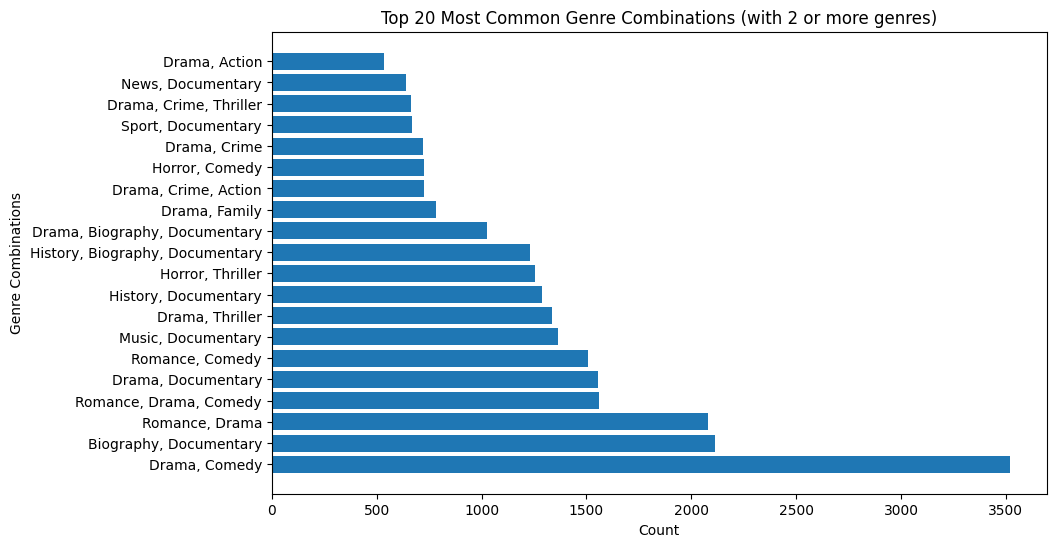

In [13]:
from collections import Counter
unique_genres = []

# Loop through each row and extract unique genre combinations with 2 or more genres
for row in sql_df['genres']:
    genres = row.split(',')
    if len(genres) >= 2:
        unique_genres.append(set(genres))

# Flatten the list of sets into a list of tuples
genre_combinations = [tuple(genre_set) for genre_set in unique_genres]

# Count the occurrences of each genre combination
genre_counts = Counter(genre_combinations)

# Get the top 10 genre combinations
top_20_genre_counts = genre_counts.most_common(20)

# Extract genre combinations and counts for plotting
top_20_genres = [', '.join(genre_tuple) for genre_tuple, count in top_20_genre_counts]
top_20_counts = [count for genre_tuple, count in top_20_genre_counts]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_20_genres, top_20_counts)
plt.ylabel('Genre Combinations')
plt.xlabel('Count')
plt.title('Top 20 Most Common Genre Combinations (with 2 or more genres)')
plt.show()

### We have established that the most common genre combinations are Comedy and Drama
So we'd advise Microsoft to create a movie on comedy and drama


# Question 3: Who would be the best director for the job?

In [14]:
# Best Directors by Genre
best_directors_per_genre = movies_df.groupby(['genre', 'director']).size().reset_index(name='count')
best_directors_per_genre = best_directors_per_genre.sort_values(['genre', 'count'], ascending=[True, False])
best_directors_per_genre = best_directors_per_genre.drop_duplicates(subset='genre', keep='first')
print("Best Directors per Genre:")
print(best_directors_per_genre[['genre', 'director', 'count']])


Best Directors per Genre:
          genre              director  count
857      Action            Tony Scott     14
1158  Adventure          Ridley Scott      6
1273  Animation             Directors     13
1493  Biography        Clint Eastwood      7
2971     Comedy           Woody Allen     33
3024      Crime        Brian De Palma     11
3722      Drama           James Ivory      9
4304     Family           Bill Condon      1
4347    Fantasy          Tibor Takács      3
4353    History             Tom Logan      1
4598     Horror            Wes Craven      7
4601      Music  Jean-Jacques Beineix      1
4602    Musical        Jerry Mitchell      1
4604    Mystery        Alan J. Pakula      1
4624    Romance    Catherine Breillat      1
4634     Sci-Fi           Danny Boyle      1
4644      Sport       Alex Ranarivelo      1
4645   Thriller           David Drury      1
4661    Western      Ferdinando Baldi      1


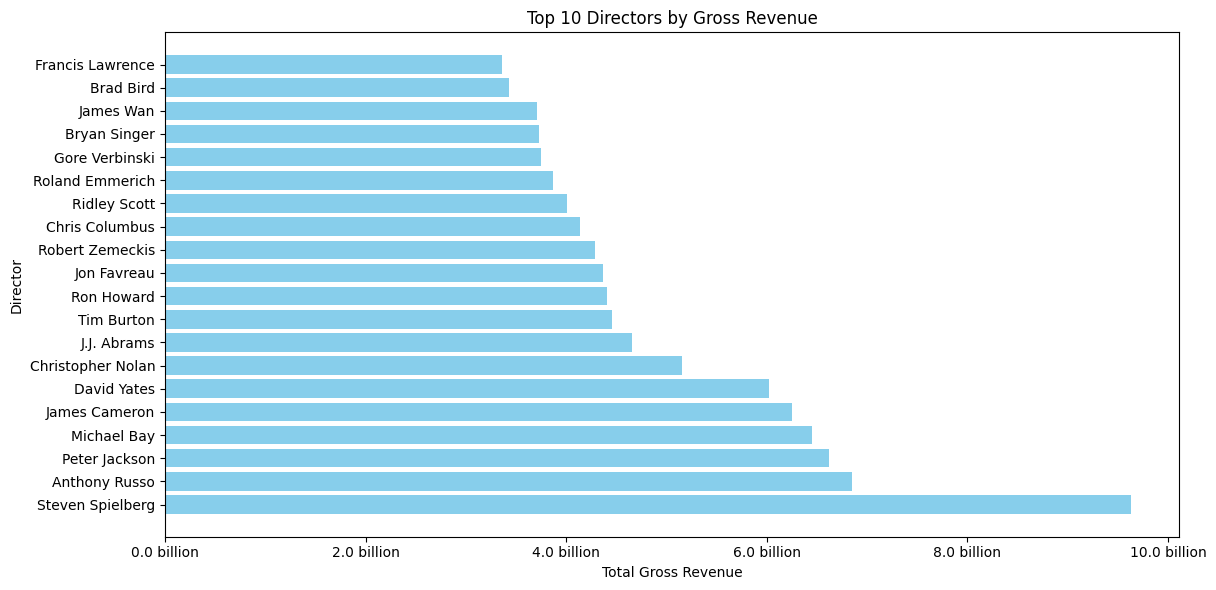

In [15]:


# Group the dataset by director and sum the gross income for each director
director_gross = movies_df.groupby('director')['gross'].sum().sort_values(ascending=False)

# Select the top 20 directors 
top_directors = director_gross.head(20)

# Create a horizontal bar plot to visualize the gross income for each director
plt.figure(figsize=(12, 6))
plt.barh(top_directors.index, top_directors.values, color='skyblue')
plt.title('Top 10 Directors by Gross Revenue')
plt.xlabel('Total Gross Revenue')
plt.ylabel('Director')
plt.tight_layout()

# Apply the billions_formatter to format y-axis ticks
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Show the plot
plt.show()


In [16]:


# Count the number of movies each director has produced and sort them in descending order.
director_counts = movies_df['director'].value_counts()
top_directors = director_counts.head(20).index

# Create an empty dictionary to store the genre counts for each director.
director_genre_counts = {}

# Iterate through the top directors.
for director in top_directors:
    director_movies = movies_df[movies_df['director'] == director]
    genre_counts = director_movies['genre'].value_counts().to_dict()
    director_genre_counts[director] = genre_counts

# Print the genre counts for each director.
# for director, genre_counts in director_genre_counts.items():
#     print(f"Director: {director}")
#     print("Genre Counts:")
#     for genre, count in genre_counts.items():
#         print(f"{genre}: {count}")
#     print("\n")


### What Experience does each of the top 20 Directors have?

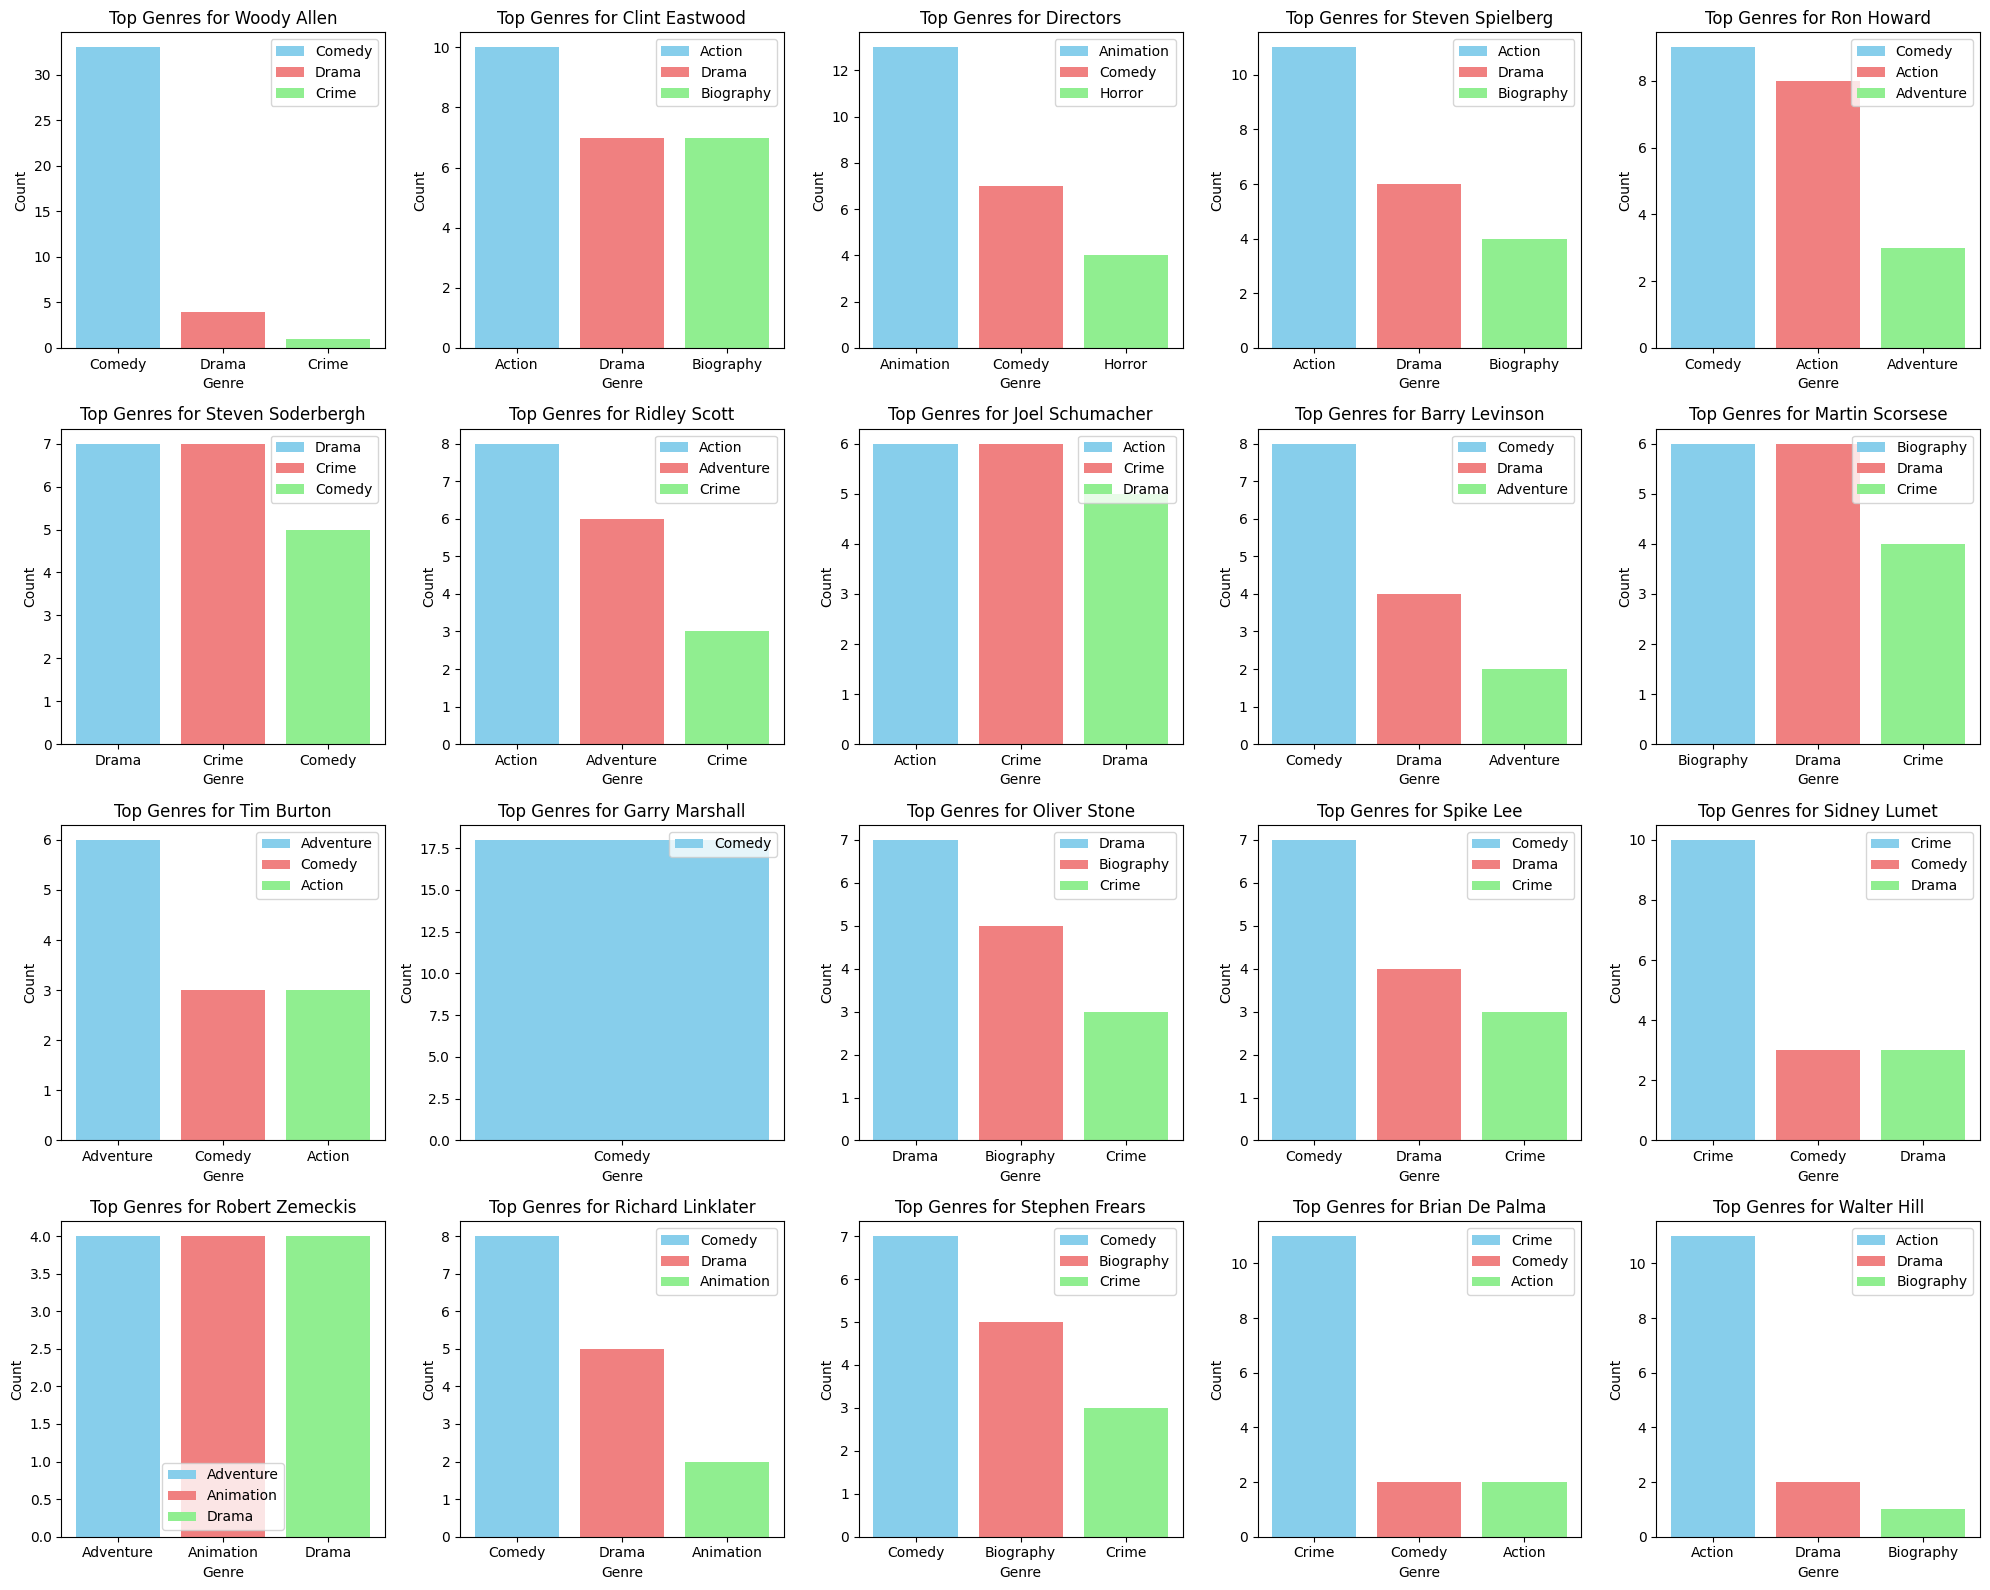

In [17]:
# Count the number of movies directed by each director.
director_counts = movies_df['director'].value_counts()

# Get the top 20 directors by movie count.
top_directors = director_counts.head(20).index

# Create a dictionary to store the top 3 genres for each director.
top3_genres_by_director = {}

# Iterate through the top directors and select the top 3 genres for each.
for director in top_directors:
    director_data = movies_df[movies_df['director'] == director]
    genre_counts = director_data['genre'].value_counts().head(3)
    top3_genres_by_director[director] = genre_counts

# Create a 4x5 grid of subplots (20 subplots in total).
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Define colors for the bars.
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Iterate through the top directors and create a subplot for each.
for i, director in enumerate(top_directors):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Create a DataFrame for the current director.
    director_data = pd.DataFrame(top3_genres_by_director[director]).T

    # Plot each genre for the director.
    for j, genre in enumerate(director_data.columns):
        ax.bar(j, director_data[genre], color=colors[j % len(colors)], label=genre)

    # Set labels and title for the subplot.
    ax.set_xlabel('Genre')
    ax.set_ylabel('Count')
    ax.set_title(f'Top Genres for {director}')
    ax.set_xticks(range(len(director_data.columns)))
    ax.set_xticklabels(director_data.columns)
    ax.legend()

# Adjust spacing between subplots.
plt.tight_layout()

# Show the subplots.
plt.show()


### Having Seen their Experience, Let us check How their Movies  perform per Genre


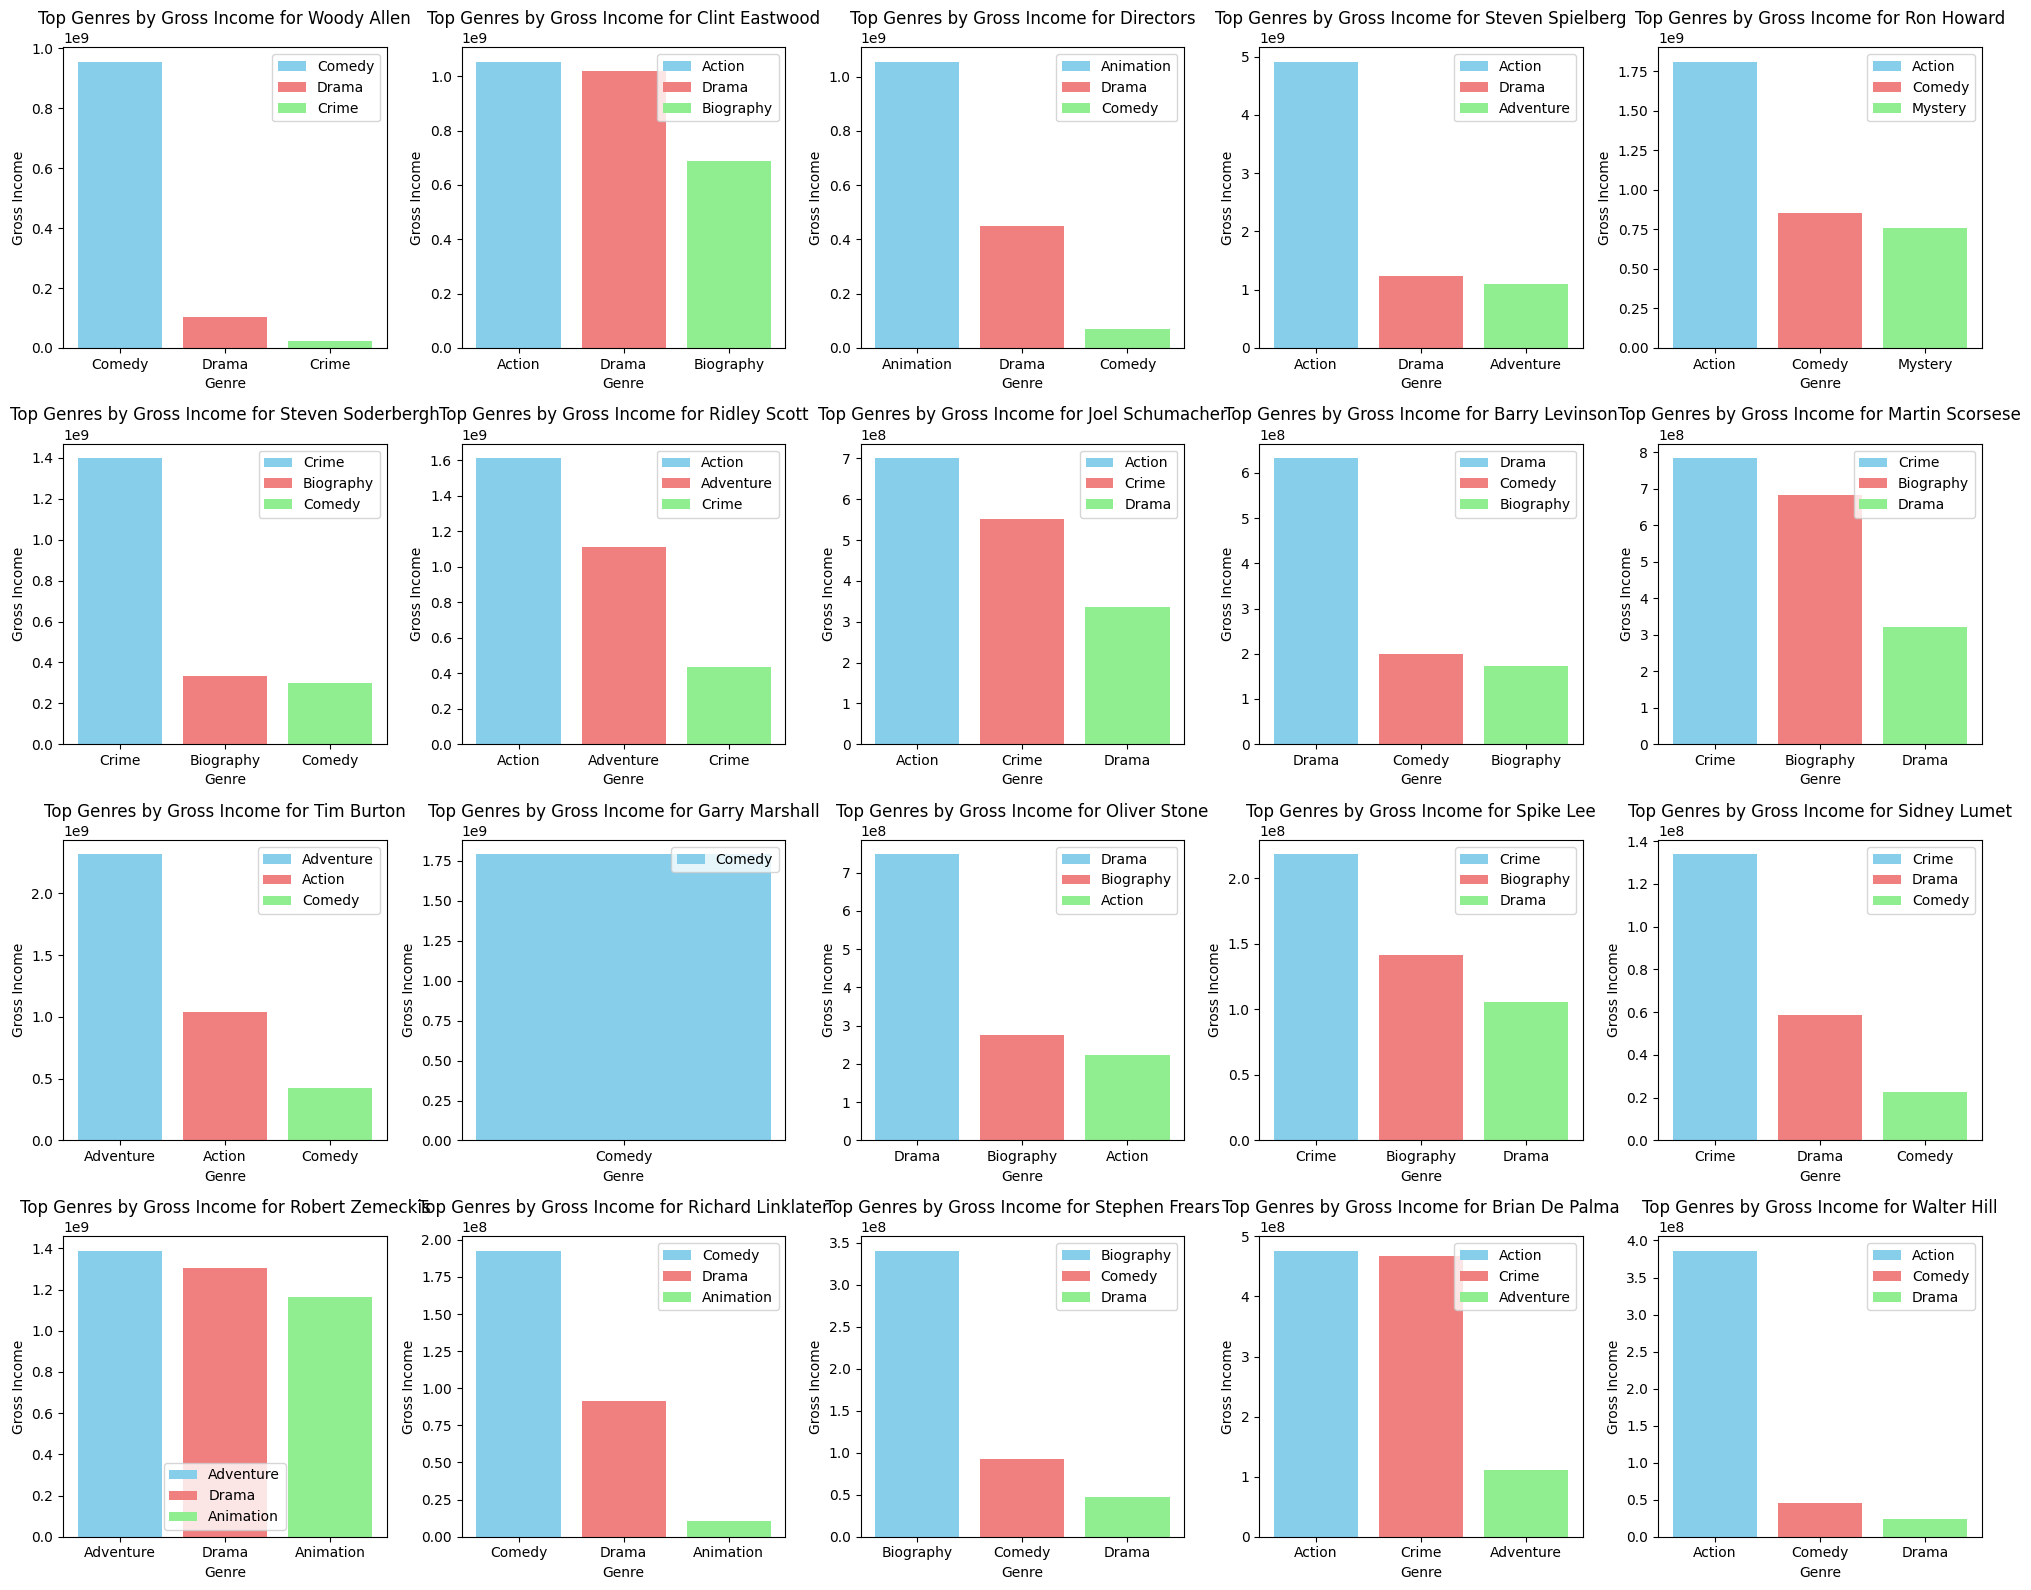

In [18]:
# Count the number of movies directed by each director.
director_counts = movies_df['director'].value_counts()

# Get the top 20 directors by movie count.
top_directors = director_counts.head(20).index

# Create a dictionary to store the top 3 genres by gross income for each director.
top3_genres_by_gross = {}

# Iterate through the top directors and select the top 3 genres by gross income for each.
for director in top_directors:
    director_data = movies_df[movies_df['director'] == director]
    # Group by genre and sum the gross income for each genre.
    genre_gross = director_data.groupby('genre')['gross'].sum()
    # Sort by gross income in descending order and select the top 3 genres.
    top3_genres = genre_gross.sort_values(ascending=False).head(3)
    top3_genres_by_gross[director] = top3_genres

# Create a 4x5 grid of subplots (20 subplots in total).
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Define colors for the bars.
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Iterate through the top directors and create a subplot for each.
for i, director in enumerate(top_directors):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Create a DataFrame for the current director.
    director_data = pd.DataFrame(top3_genres_by_gross[director]).T

    # Plot each genre's gross income for the director.
    for j, genre in enumerate(director_data.columns):
        ax.bar(j, director_data[genre], color=colors[j % len(colors)], label=genre)

    # Set labels and title for the subplot.
    ax.set_xlabel('Genre')
    ax.set_ylabel('Gross Income')
    ax.set_title(f'Top Genres by Gross Income for {director}')
    ax.set_xticks(range(len(director_data.columns)))
    ax.set_xticklabels(director_data.columns)
    ax.legend()

# Adjust spacing between subplots.
plt.tight_layout()

# Show the subplots.
plt.show()


### Since we understand that the best genres are Animation, Comedy and Drama, The directors with highest experience in these areas are:
 Comedy  - Garry Marshall, Woody Allen
 Drama - Barry Levinson

## Therefore, if Microsoft wants to enter the film industry, they need to invest in creating a comedy, animation or drama. They can also create a movie that combines all these elements or any two. They can contract Barry Levinson, Woody Allen or Garry Marshall to create the film.

# Bonus


In [19]:
# Find the most profitable genre
# Create a new column  - Profit
movies_df['profit'] = movies_df.gross - movies_df.budget

In [20]:


# Clean the dataset (optional, handle missing values) The profit column has some NaN values
movies_df['profit'].fillna(0, inplace=True)

# Replace negative profit values with zero for visualization purposes ( The operation in a previous step 
# left some movies having a negative profit value)
movies_df['profit'] = movies_df['profit'].apply(lambda x: max(x, 0))

# Create an interactive scatter plot
fig = px.scatter(
    movies_df,  # Change 'movie_df' to 'movies_df'
    x='budget',
    y='gross',
    size='profit',  # Modify this based on your preference or use another column
    color='genre',  # Change to 'genre' for color scaling
    hover_name='name',
    animation_frame='year',
    title='Interactive  Visualization Showing Relationship Between Budget and Gross Income for Various Genres 1980-2020',
    labels={'budget': 'Budget', 'gross': 'Gross Earnings'},
    size_max=70,  # Increase the maximum size of the bubbles
    opacity=0.7,  # Increase the opacity of the bubbles
)

# Customize the plot layout
fig.update_layout(
    xaxis_type='log',  # Logarithmic scale for budget
    
    # Set the y-axis range to start at 1 million (1,000,000)
    yaxis_type='log',  
    yaxis_title='Gross Earnings (log scale)',
    yaxis_range=[6, 10],  # Logarithmic scale of 6 corresponds to 1 million
    
    xaxis_title='Budget (log scale)',
    showlegend=True,
    coloraxis_colorbar=dict(title='Genre'),  # Change the colorbar title to 'Genre'
    
    # Adjust the height and margin
    height=800,  # Increase the height
    margin=dict(l=40, r=40, b=40, t=80),  # Adjust margins to center the plot
)

# Set the lower bound of the x-axis to 1 million (1,000,000)
fig.update_xaxes(
    range=[6, 9],  # Logarithmic scale of 6 corresponds to 1 million
)

# Add text annotations (optional)
fig.add_trace(
    px.scatter(
        movies_df[movies_df['year'] == movies_df['year'].max()],
        x='budget',
        y='gross',
        text='name',
    ).data[0]
)

# Show the plot
fig.show()


#### This animation shows that there has been an increase in Budget and Earnings from each movie since 1980s
There is a general trend in increase in cost of producing the movies

Animations and comedy seems to be some of the highest grossing movies since 2010
